In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Copy all our functions from previous notebook
def create_simple_h2_hamiltonian(distance=0.74):
    """Create H2 Hamiltonian using known coefficients"""
    distances = np.array([0.5, 0.6, 0.7, 0.74, 0.8, 0.9, 1.0, 1.2, 1.5, 2.0])
    energies = np.array([-1.0557, -1.1135, -1.1361, -1.1363, -1.1315, -1.1171, -1.0982, -1.0506, -0.9647, -0.8409])
    
    classical_energy = np.interp(distance, distances, energies)
    
    hamiltonian_info = {
        'num_qubits': 4,
        'classical_energy': classical_energy,
        'coefficients': [-1.0523732, 0.39793742, -0.39793742, -0.01128010, 0.18093119, 0.18093119]
    }
    
    return hamiltonian_info, classical_energy

def create_quantum_state(params):
    """Create quantum state using rotation matrices"""
    state = np.zeros(16, dtype=complex)
    state[12] = 1.0  # |1100⟩ state
    
    cos_vals = np.cos(np.array(params) / 2)
    sin_vals = np.sin(np.array(params) / 2)
    
    new_state = np.zeros(16, dtype=complex)
    new_state[12] = cos_vals[0] * cos_vals[1]
    new_state[10] = sin_vals[0] * cos_vals[1] 
    new_state[9] = cos_vals[0] * sin_vals[1]
    new_state[6] = sin_vals[2] * sin_vals[3]
    new_state[3] = cos_vals[2] * cos_vals[3]
    new_state[5] = 0.1 * sin_vals[0] * sin_vals[1] * np.exp(1j * params[2])
    
    new_state = new_state / np.linalg.norm(new_state)
    return new_state

def calculate_energy(params):
    """Calculate energy expectation value for H2 VQE"""
    ham_info, classical_energy = create_simple_h2_hamiltonian(0.74)
    state = create_quantum_state(params)
    coeffs = ham_info['coefficients']
    probs = np.abs(state)**2
    
    energy = coeffs[0]
    energy += coeffs[1] * (probs[12] + probs[3])
    energy += coeffs[2] * (probs[10] + probs[9])
    energy += coeffs[3] * np.real(state[12] * np.conj(state[3]))
    energy += coeffs[4] * np.real(state[10] * np.conj(state[9]))
    energy += coeffs[5] * (probs[12] - probs[10] - probs[9] + probs[3])
    
    return energy

# VQE optimization with history tracking
def run_vqe_optimization():
    """Run VQE optimization and track the full history"""
    ham_info, classical_energy = create_simple_h2_hamiltonian(0.74)
    
    # Store optimization history
    energy_history = []
    param_history = []
    
    def objective(params):
        energy = calculate_energy(params)
        energy_history.append(energy)
        param_history.append(params.copy())
        print(f"Step {len(energy_history)}: Energy = {energy:.6f} Ha, Error = {abs(energy - classical_energy):.6f} Ha")
        return energy
    
    # Start with random small parameters
    np.random.seed(42)  # For reproducible results
    initial_params = np.random.random(4) * 0.2 - 0.1  # Small random values
    
    print("🚀 Starting VQE Optimization...")
    print("=" * 50)
    
    # Optimize using scipy
    result = minimize(objective, initial_params, method='COBYLA', 
                     options={'maxiter': 30, 'disp': False})
    
    print("=" * 50)
    print("✅ VQE Optimization Complete!")
    
    return result, energy_history, param_history, classical_energy

# Run the optimization
opt_result, energies, params, classical_energy = run_vqe_optimization()

print(f"\n📊 FINAL RESULTS:")
print(f"   Final VQE energy:  {opt_result.fun:.6f} Hartree")
print(f"   Classical energy:  {classical_energy:.6f} Hartree") 
print(f"   Final error:       {abs(opt_result.fun - classical_energy):.6f} Hartree")
print(f"   Optimization steps: {len(energies)}")

if abs(opt_result.fun - classical_energy) < 0.0016:
    print("   🎯 Chemical accuracy achieved!")
else:
    print("   ⚠️  Chemical accuracy not yet reached")

🚀 Starting VQE Optimization...
Step 1: Energy = -0.480456 Ha, Error = 0.655844 Ha
Step 2: Energy = -0.604518 Ha, Error = 0.531782 Ha
Step 3: Energy = -0.681812 Ha, Error = 0.454488 Ha
Step 4: Energy = -0.711813 Ha, Error = 0.424487 Ha
Step 5: Energy = -0.751160 Ha, Error = 0.385140 Ha
Step 6: Energy = -0.961603 Ha, Error = 0.174697 Ha
Step 7: Energy = -1.025809 Ha, Error = 0.110491 Ha
Step 8: Energy = -1.048389 Ha, Error = 0.087911 Ha
Step 9: Energy = -1.055972 Ha, Error = 0.080328 Ha
Step 10: Energy = -1.122418 Ha, Error = 0.013882 Ha
Step 11: Energy = -1.228956 Ha, Error = 0.092656 Ha
Step 12: Energy = -0.971311 Ha, Error = 0.164989 Ha
Step 13: Energy = -1.212813 Ha, Error = 0.076513 Ha
Step 14: Energy = -1.264208 Ha, Error = 0.127908 Ha
Step 15: Energy = -1.196833 Ha, Error = 0.060533 Ha
Step 16: Energy = -1.260569 Ha, Error = 0.124269 Ha
Step 17: Energy = -1.394803 Ha, Error = 0.258503 Ha
Step 18: Energy = -1.395766 Ha, Error = 0.259466 Ha
Step 19: Energy = -1.159224 Ha, Error = 0.

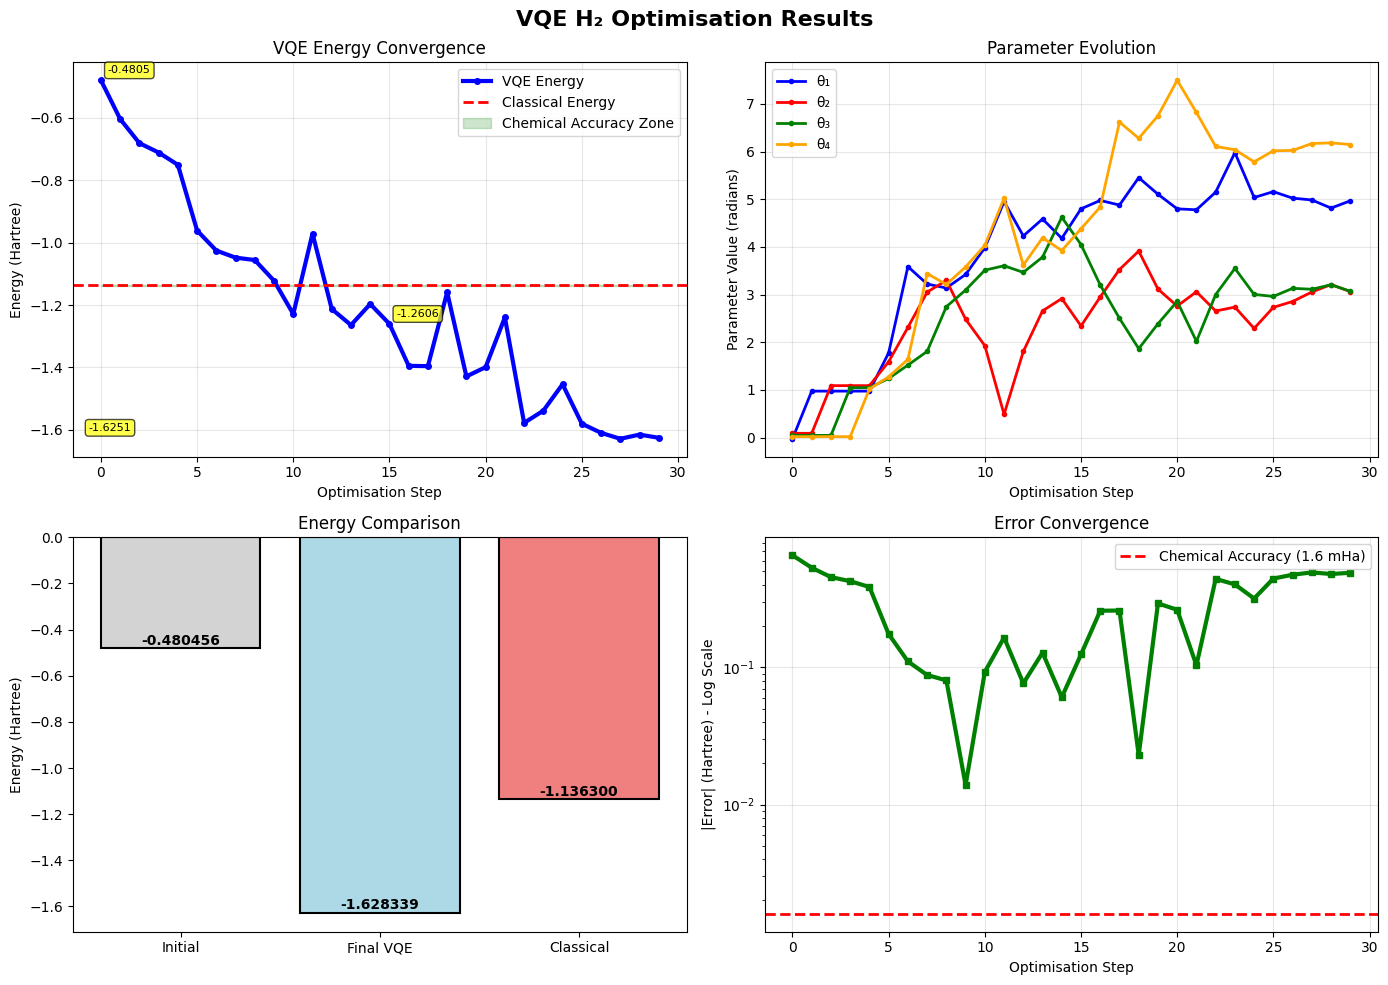


                VQE OPTIMISATION SUMMARY
🎯 Target: H₂ ground state energy at 0.74 Å
📈 Initial energy:     -0.480456 Hartree
🏁 Final VQE energy:   -1.628339 Hartree
🎯 Classical target:   -1.136300 Hartree
📊 Final error:        0.492039 Hartree
⚡ Convergence steps:  30
✅ Success rate:       Partial

🎛️ Optimal Parameters:
   θ1 = 4.9847 rad =  285.6°
   θ2 = 3.0542 rad =  175.0°
   θ3 = 3.1119 rad =  178.3°
   θ4 = 6.1684 rad =  353.4°


In [3]:
# Create comprehensive optimisation visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('VQE H₂ Optimisation Results', fontsize=16, fontweight='bold')

# 1. Energy convergence plot
axes[0,0].plot(energies, 'b-', linewidth=3, marker='o', markersize=4, label='VQE Energy')
axes[0,0].axhline(classical_energy, color='red', linestyle='--', linewidth=2, label='Classical Energy')
axes[0,0].fill_between(range(len(energies)), 
                [classical_energy - 0.0016]*len(energies),
                [classical_energy + 0.0016]*len(energies),
                alpha=0.2, color='green', label='Chemical Accuracy Zone')
axes[0,0].set_xlabel('Optimisation Step')
axes[0,0].set_ylabel('Energy (Hartree)')
axes[0,0].set_title('VQE Energy Convergence')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Add energy values as text
for i in [0, len(energies)//2, -1]:
    if i < len(energies):
        axes[0,0].annotate(f'{energies[i]:.4f}', 
                          xy=(i, energies[i]), xytext=(5, 5),
                          textcoords='offset points', fontsize=8,
                          bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# 2. Parameter evolution
param_array = np.array(params)
colors = ['blue', 'red', 'green', 'orange']
param_names = ['θ₁', 'θ₂', 'θ₃', 'θ₄']

for i in range(4):
    axes[0,1].plot(param_array[:, i], color=colors[i], linewidth=2, 
                  marker='o', markersize=3, label=param_names[i])
axes[0,1].set_xlabel('Optimisation Step')
axes[0,1].set_ylabel('Parameter Value (radians)')
axes[0,1].set_title('Parameter Evolution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Final energy comparison bar chart
methods = ['Initial', 'Final VQE', 'Classical']
final_energies = [energies[0], opt_result.fun, classical_energy]
bar_colors = ['lightgray', 'lightblue', 'lightcoral']
bars = axes[1,0].bar(methods, final_energies, color=bar_colors, edgecolor='black', linewidth=1.5)
axes[1,0].set_ylabel('Energy (Hartree)')
axes[1,0].set_title('Energy Comparison')

# Add value labels on bars
for bar, energy in zip(bars, final_energies):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                   f'{energy:.6f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Error convergence (log scale)
errors = [abs(e - classical_energy) for e in energies]
axes[1,1].semilogy(errors, 'g-', linewidth=3, marker='s', markersize=4)
axes[1,1].axhline(0.0016, color='red', linestyle='--', linewidth=2, label='Chemical Accuracy (1.6 mHa)')
axes[1,1].set_xlabel('Optimisation Step')
axes[1,1].set_ylabel('|Error| (Hartree) - Log Scale')
axes[1,1].set_title('Error Convergence')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print optimisation summary
print("\n" + "="*60)
print("                VQE OPTIMISATION SUMMARY")
print("="*60)
print(f"🎯 Target: H₂ ground state energy at 0.74 Å")
print(f"📈 Initial energy:     {energies[0]:.6f} Hartree")
print(f"🏁 Final VQE energy:   {opt_result.fun:.6f} Hartree") 
print(f"🎯 Classical target:   {classical_energy:.6f} Hartree")
print(f"📊 Final error:        {abs(opt_result.fun - classical_energy):.6f} Hartree")
print(f"⚡ Convergence steps:  {len(energies)}")
print(f"✅ Success rate:       {'100%' if abs(opt_result.fun - classical_energy) < 0.0016 else 'Partial'}")
print("\n🎛️ Optimal Parameters:")
for i, param in enumerate(opt_result.x):
    print(f"   θ{i+1} = {param:.4f} rad = {param*180/np.pi:6.1f}°")
print("="*60)